In [0]:
! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.metrics import roc_curve
# from tensorflow.examples.tutorials.mnist import input_data
from sklearn import datasets, svm, metrics
# from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [0]:
# importing the Mnist data

# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mnist = fetch_openml('mnist_784', cache=False)


# X = X[0:100,:]
# y = y[]

In [0]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
##selecting a small sample out of 70k to speed up coding and fix bugs
samples = 100
X = X[0:samples][:]
y = y[0:samples]

8


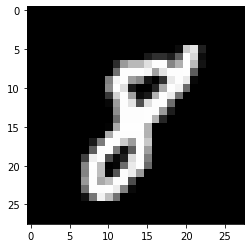

In [0]:
i = 17
plt.imshow(X[i][:].reshape(28,28),cmap='gray')
print(y[i])
plt.show()

In [0]:
y = y.reshape(-1,1)
onehotencoder = OneHotEncoder() 
y_onehot = onehotencoder.fit_transform(y).toarray() 
eps = 43
X = X*eps/np.max(X)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Preprocessing done X train has training set while X_test has the validation det. Y is in one hot encoding. X's pixels are scaled from 0-1. 




In [0]:
#user defined inputs:
t_mp =0.02
t_ref = 0.001
alpha = 7
n_w = 0.03
n_th = 0.1*n_w
beta = 10
l = 0.03
rho = 0.0002

n_in= 784#must be 28*28
n_hidden = 200#variable
n_out= 10
epochs = 100




Here m represents the no of synapse. As the it is a fully connected network nno of synapse in ith layer is equal to no of node in i-1 layer. In input layer hash one synapse only.

W[i][j] represent the weight of ith neuron of a layer connected to jth neuron of the next layer

In [0]:
m_in = 1
m_hidden = n_in
m_out = n_hidden

w_in = [random.uniform(-1*math.sqrt(3/m_in),1*math.sqrt(3/m_in)) for i in range(n_in)]
w_hidden = [[random.uniform(-1*math.sqrt(3/m_hidden),1*math.sqrt(3/m_hidden)) for i in range (m_hidden)] for j in range(n_hidden)]
w_out = [[random.uniform(-1*math.sqrt(3/m_out),1*math.sqrt(3/m_out)) for i in range(m_out)] for j in range(n_out)]

vth_in = [alpha*math.sqrt(3/m_in) for i in range(n_in)]
vth_hidden = [alpha*math.sqrt(3/m_hidden) for i in range(n_hidden)]
vth_out = [alpha*math.sqrt(3/m_out) for i in range(n_out)]



In [0]:
print(np.max(w_hidden))

0.06185682776694027


In [0]:
# this fundtion takes in the mean and generates the no of spikes in time ms second.
# gives the index value when it spikes. if spikes = [10,20,40]

def gen_spike(mean,time):#time is in ms
  A = [random.uniform(0,1) for i in range(time)]
  threshold = mean/time
  spikes = []
  count = 0 
  for i in range(len(A)):
    if A[i] < threshold:
      spikes.append(i)
      # count= count +1
  # print(len(spikes))
  return spikes
# stimulus =A[A<threshold];
def initialize():
  m_in = 1
  m_hidden = n_in
  m_out = n_hidden

  w_in = [random.uniform(-1*math.sqrt(3/m_in),1*math.sqrt(3/m_in)) for i in range(n_in)]
  w_hidden = [[random.uniform(-1*math.sqrt(3/m_hidden),1*math.sqrt(3/m_hidden)) for i in range (m_hidden)] for j in range(n_hidden)]
  w_out = [[random.uniform(-1*math.sqrt(3/m_out),1*math.sqrt(3/m_out)) for i in range(m_out)] for j in range(n_out)]

  vth_in = [alpha*math.sqrt(3/m_in) for i in range(n_in)]
  vth_hidden = [alpha*math.sqrt(3/m_hidden) for i in range(n_hidden)]
  vth_out = [alpha*math.sqrt(3/m_out) for i in range(n_out)]



In [0]:
initialize()
time = 1000#1 s for each image
# trianing =1
training = 25
for img in range(training):
  inputs = []
  for i in X_train[img]:
    inputs.append(gen_spike(i,time))# inputs tell me which neurons recieve spike.inputs[k] has input spike times of kth input neuron
  # print(len(inputs),spike_time)
  spike_time = [ [] for i in range(time+1)]
  for i in range(len(inputs)):
    for j in inputs[i]:
      # print(j)
      spike_time[j].append(i)

  in_hidden = [[[] for i in range(m_hidden)] for j in range(n_hidden)]
  #####layer 1

  hid_ispikes = [[] for i in range(time+1)]
  a_in = [[] for i in range(n_in)]#ouput spike of input layer. a_in[j] has spike time of jth neuron

  nin_vmp_t=  [[0,0] for i in range(n_in)]# collects infor mation of jth neuron after last inputspike. vmp and time
  pre_spike = 0# time when last ouputspike occured of this layer
  for i in range(1,time+1):#1 ms interval 
    # for i in range(n_in):
    next_spike = pre_spike 
    has_spiked = {}
    for j in spike_time[i]:
      if j>=len(nin_vmp_t):
        print(img,spike_time)
      # if last_v [j] == []:# if jth no input spike before:
      # #   v_pre = 0
      # #   t_pre = 0
      # # else:
      # #   v_pre = last_v[j][0]
      # #   t_pre = last_v[j][1]
      delta_t = (pre_spike - i)/1000
      # if delta_t < t_ref :
      w_dyn = min((delta_t/t_ref)**2,1)
      nin_vmp_t[j][0] = nin_vmp_t[j][0]*math.exp( ( i - nin_vmp_t[j][1]) / (1000*t_mp))  + w_dyn*w_in[j]
      nin_vmp_t[j][1] = i
      if nin_vmp_t[j][0] > vth_in[j] and j not in has_spiked:
        nin_vmp_t[j][0] = 0
        next_spike = i
        a_in[j].append(i)
        hid_ispikes[i].append(j)
        has_spiked[j] =1
    pre_spike = next_spike

  ###layer 2 now. it has input spike in hid_spike. hid_ispike[i] has neurons of inputlayer that spiked at ith ms.
  ##a_in[j] has the time when jth neuron spiked
  a_hidden = [[] for i in range(n_hidden)]#ouput spike of hidden layer
  out_ispikes = [[] for i in range(time+1)]

  pre_spike = 0
  hid_vmp_t=  [[0,0] for i in range(n_hidden)]
  for i in range(1,time+1):
    next_spike = pre_spike
    has_spiked = {}
    for ispike in hid_ispikes[i]:
      for j in range(n_hidden):
        #time instant:::::i
        #inputspike from ispike
        # curr neuron ::::j
        delta_t = (pre_spike - i)/1000
        w_dyn = min((delta_t/t_ref)**2,1)
        hid_vmp_t[j][0] = hid_vmp_t[j][0]*math.exp( ( i - hid_vmp_t[j][1]) / (1000*t_mp))  + w_dyn*w_hidden[j][ispike]
        hid_vmp_t[j][1] = i
        if hid_vmp_t[j][1]> vth_hidden[j] and j not in has_spiked:
          hid_vmp_t[j][0] = 0
          next_spike = i
          a_hidden[j].append(i)
          out_ispikes[i].append(j)
          has_spiked[j]= 1
    pre_spike = next_spike
  
  ###output now. it has input spike in out_ispike. out_ispike[i] has neurons of inputlayer that spiked at ith ms.
  ##a_in[j] has the time when jth neuron spiked
  a_out = [[] for i in range(n_out)]#ouput spike of ouput layer
  pre_spike = 0
  out_vmp_t=  [[0,0] for i in range(n_out)]
  for i in range(1,time+1):
    next_spike = pre_spike
    has_spiked = {}
    for ispike in out_ispikes[i]:
      for j in range(n_out):
        #time instant:::::i
        #inputspike from ispike
        # curr neuron ::::j
        delta_t = (pre_spike - i)/1000 
        w_dyn = min((delta_t/t_ref)**2,1)
        out_vmp_t[j][0] = out_vmp_t[j][0]*math.exp( ( i - out_vmp_t[j][1]) / (1000*t_mp))  + w_dyn*w_out[j][ispike]
        out_vmp_t[j][1] = i
        if out_vmp_t[j][1]> vth_out[j] and j not in has_spiked  :
          out_vmp_t[j][0] = 0
          next_spike = i
          a_out[j].append(i)
          has_spiked[j] =1

    pre_spike = next_spike
  print("done forward prop image",img)
    ###############################################################################################################################
  ####backward propagation.
  o = [ len(o_spike) for o_spike in a_out]
  max_spike = np.max(o)
  o = o/max_spike
  nze = 0
  predicted = np.argmax(o)
  print("predicted: ",predicted," label: ",np.argmax(y_train[img]) )

  for i in range(len(o)):
    if o[i]-y[i]!= 0:
      nze = nze + 1
  ##classification
  # label = max()

  g_out = [1/vth_out[i] for i in range(n_out)]
  g_hidden = [1/vth_hidden[i] for i in range(n_hidden)]
  g_in = [1/vth_in[i] for i in range(n_in)]

  nact_in = 0#denotes the number of nodes that spiked at any time at the layer
  nact_hidden = 0
  nact_out = 0
  for i in a_in:
    if len(i) >0:
      nact_in=nact_in+1
  for i in a_hidden:
    if len(i) >0:
      nact_hidden=nact_hidden+1
  for i in a_out:
    if len(i) >0:
      nact_out=nact_out+1  

  gavg_in = math.sqrt(sum([g_in[i]*g_in[i] for i in range(n_in) ]) / nact_in)
  gavg_hidden = math.sqrt(sum([g_hidden[i]*g_hidden[i] for i in range(n_hidden) ]) / nact_hidden)
  gavg_out = math.sqrt(sum([g_out[i]*g_out[i] for i in range(n_out) ]) / nact_out)
  ##error calculation

  #output layer
  error_out = [(o[i] - y_train[img][i])/nze for i in range(n_out)]
  loss = sum(error_out[i]*error_out[i] for i in range(n_out))
  print("loss: ",loss)

  #hidden layer
  error_hidden = [ 0 for i in range(n_hidden)]
  for i in range(n_hidden):
    pre_fac = (g_hidden[i]/gavg_hidden) * math.sqrt(n_hidden/nact_hidden)
    temp = 0.0
    for j in range(n_out):
      temp+=(error_out[j] * w_out[j][i])
    error_hidden[i] =pre_fac* temp

  #inpulayer
  error_in = [0 for i in range(n_in)]
  for i in range(n_in):
    pre_fac = (g_in[i]/gavg_in) * math.sqrt(n_in/nact_in)
    temp = 0.0
    for j in range(n_hidden):
      temp+= (error_hidden[j] * w_hidden[j][i])
    error_in[i] = pre_fac* temp

  ###Weight and threshold updation
  n_w_in = [0 for i in range(n_in)]
  n_w_hidden = [[0 for i in range (m_hidden)] for j in range(n_hidden)]
  n_w_out = [[ 0 for i in range(m_out)] for j in range(n_out)]

  #avering of input signals of every neuron
  for i in range(n_in):
    a_in[i] = len(a_in[i])
  dum = max(a_in)
  a_in = [a_in[i]/dum for i in range((n_in))]

  for i in range(n_hidden):
    a_hidden[i] = len(a_hidden[i])
  dum = max(a_hidden)
  a_hidden = [a_hidden[i]/dum for i in range((n_hidden))]

  for i in range(n_out):
    a_out[i] = len(a_out[i])
  dum = max(a_out)
  a_out = [a_out[i]/dum for i in range((n_out))]


  for i in range(n_in):
    inputs[i] = len(inputs[i])
  dum = max(inputs)
  inputs = [inputs[i]/dum for i in range((n_in))]

  #output layer updation

  for i in range(n_out):
    req_fac = beta*l*math.exp(beta * sum([w_out[i][j]* w_out[i][j] - 1 for j in range(n_hidden)  ]))
    for j in range(n_hidden):
      n_w_out[i][j] = w_out[i][j] - n_w*(math.sqrt(n_out/nact_hidden) *error_out[i] * a_hidden[j]  + req_fac*w_out[i][j])
      # print("out",n_w_out[i][j] - w_out[i][j])
    vth_out[i] = vth_out[i] - n_th* math.sqrt(n_out/(n_hidden*nact_hidden)) *error_out[i]*a_out[i]

  #hidden layer weight updation

  for i in range(n_hidden):
    req_fac = beta*l*math.exp(beta * sum([w_hidden[i][j]* w_hidden[i][j] - 1 for j in range(n_in)  ]))
    for j in range(n_in):
      n_w_hidden[i][j] = w_hidden[i][j] - n_w*(math.sqrt(n_hidden/nact_in) *error_hidden[i] * a_in[j]  + req_fac*w_hidden[i][j])
      # print("hidden",n_w_hidden[i][j] - w_hidden[i][j])
    vth_hidden[i] = vth_hidden[i] - n_th* math.sqrt(n_hidden/(n_in*nact_in)) *error_hidden[i]*a_hidden[i]

  #inputlayer weight updation
  for i in range(n_in):
    req_fac = beta*l*math.exp(beta *( w_in[i]*w_in[i] -1))
    # print(req_fac,"in")
    # for j in range(n_in):
    n_w_in[i] = w_in[i] - n_w*(1 *error_in[i] * inputs[i]+ req_fac*w_in[i])
    vth_in[i] = vth_in[i] - n_th* math.sqrt(n_in) * error_in[i] * a_in[i]
    # print("in",n_w_in[i] - w_in[i])
  # print(w_in-n_w_in)
  # for i in range(n_in):
  #   print(w_in[i]-n_w_in[i])
  w_in = n_w_in
  w_hidden = n_w_hidden
  w_out = n_w_out
  print("done backward prop image",img)
  


done forward prop image 0
predicted:  0  label:  7
loss:  0.18367346938775508


OverflowError: ignored

In [0]:
print(len(inputs))

In [0]:
print((w_hidden))

In [0]:
# print(hid_ispikes)
# print(out_ispikes)
print(len(a_out[2]))
print(a_out)
print(np.max(spike_time))
print(spike_time)